In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Import the datasets

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [3]:
# Data description
# with open('data/data_description.txt', 'r') as reader:
#     print(reader.read())

### Looking at data

In [4]:
train.shape

(1460, 81)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.shape

(1459, 80)

In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
sample_submission.shape

(1459, 2)

In [9]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### Descriptive statistics

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Exploratory Data Analysis

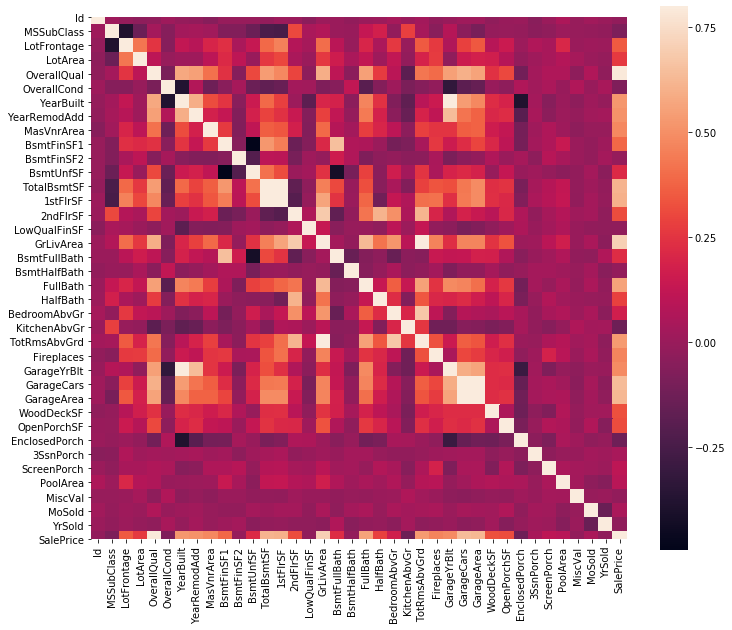

In [11]:
#Correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

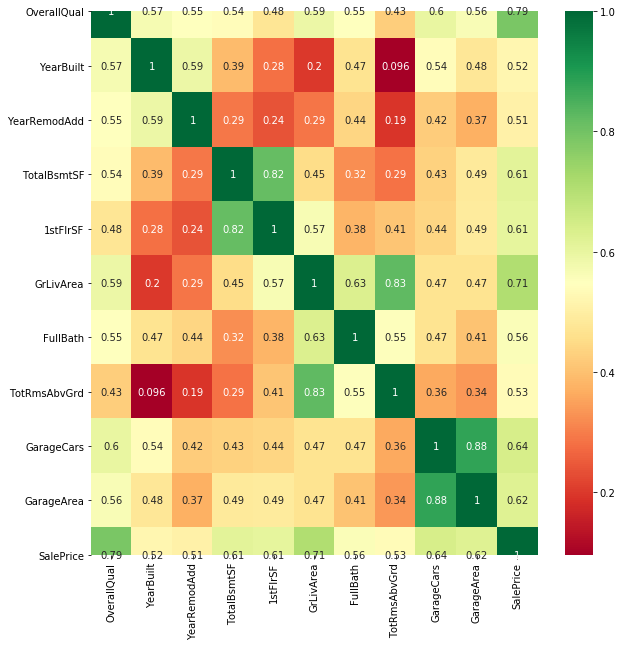

In [12]:
# Most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

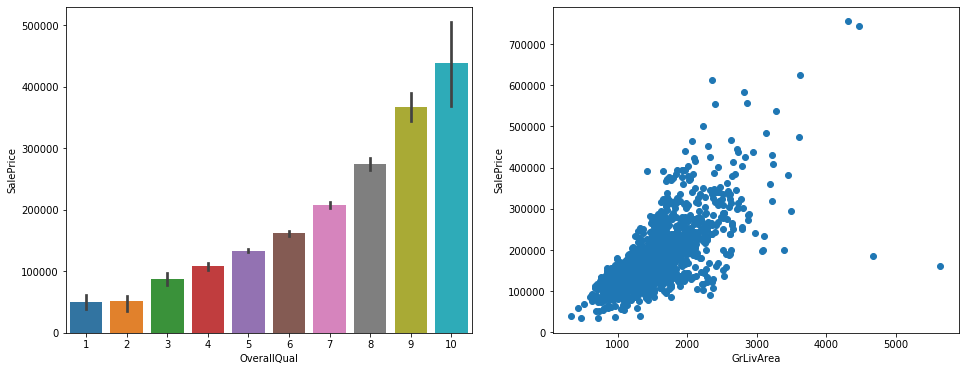

In [13]:
# Highely correlated variables with sales price
f,ax = plt.subplots(1,2, figsize=(16,6))
sns.barplot(train.OverallQual,train.SalePrice, ax = ax[0])
plt.scatter(train.GrLivArea,train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

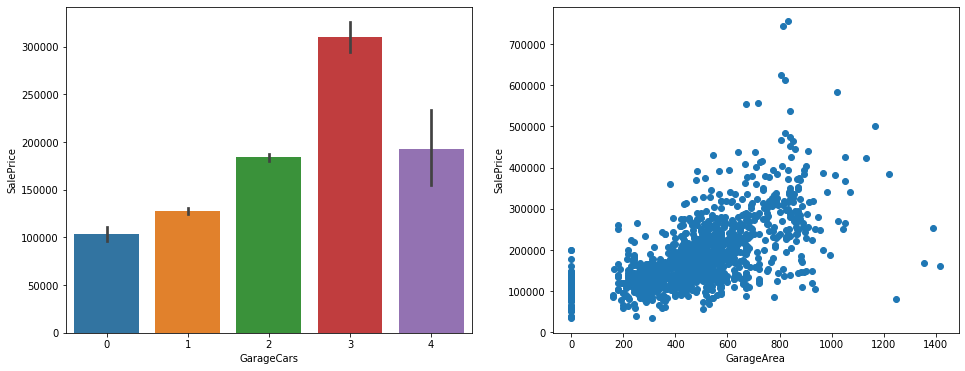

In [14]:
f,ax = plt.subplots(1,2, figsize=(16,6))
sns.barplot(train.GarageCars,train.SalePrice, ax = ax[0])
plt.scatter(train.GarageArea,train.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

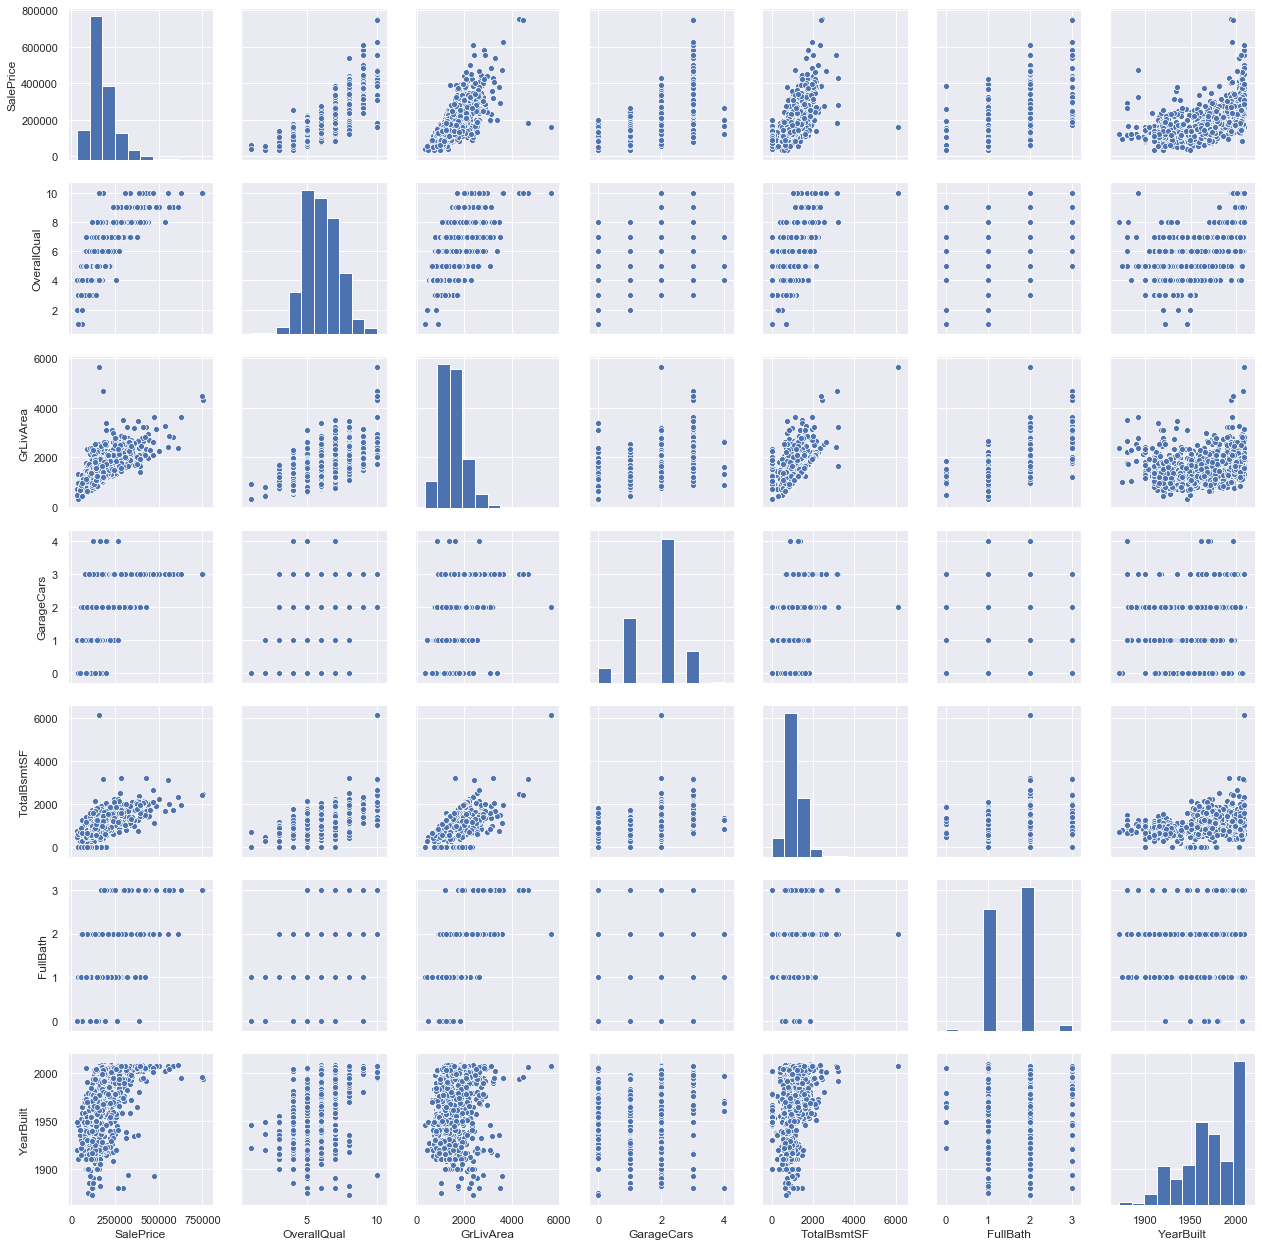

In [15]:
# Comparing Most correlated features correlation with SalePrice
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

### Target variable analysis

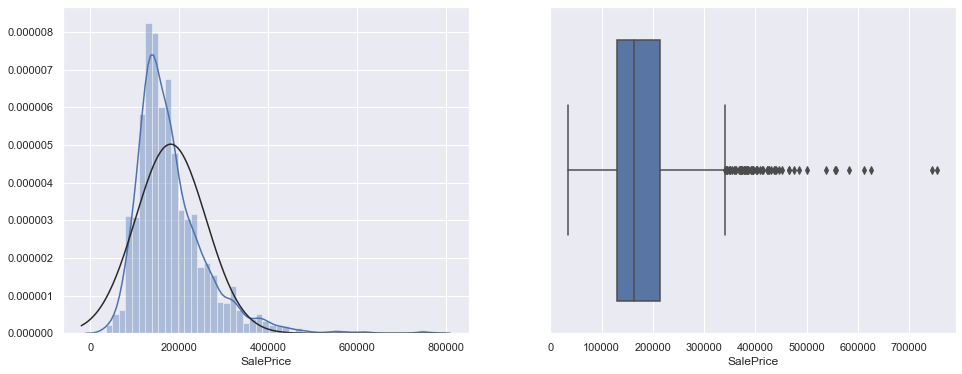

skewness and kurtosis are:
Skewness: 1.882876
Kurtosis: 6.536282


In [16]:
f, ax = plt.subplots(1,2, figsize=(16,6))
sns.distplot(train.SalePrice,fit=norm, ax = ax[0])
sns.boxplot(train.SalePrice)
plt.show()

# skewness and kurtosis
print("skewness and kurtosis are:")
print("Skewness: %f" % train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())

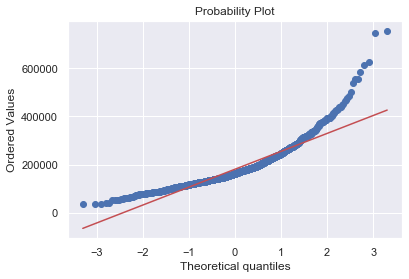

In [17]:
# Probability Plot
fig = plt.figure()
res = stats.probplot(train.SalePrice, plot=plt)
plt.show()

In [18]:
# Obtaining target variable
y = np.log1p(train.SalePrice)

### Ensuring Approximate Normality of dependent variable

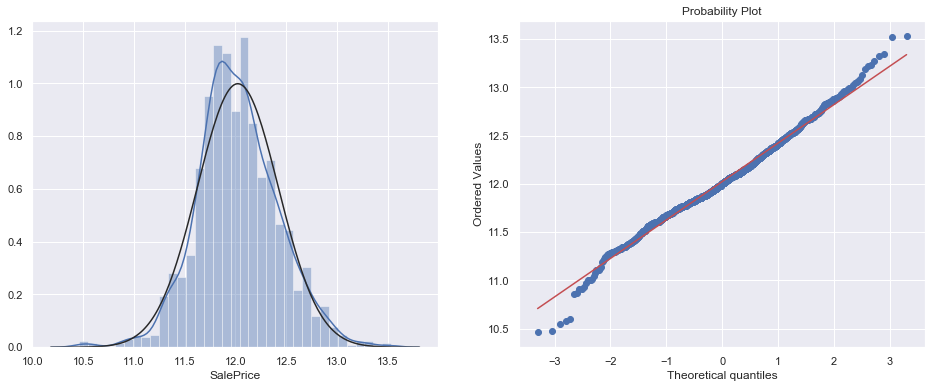

In [19]:
# visualising after transforming dependent variable
f, ax = plt.subplots(1,2, figsize=(16,6))
sns.distplot(y,fit=norm, ax = ax[0])
res = stats.probplot(y, plot=plt)
plt.show()

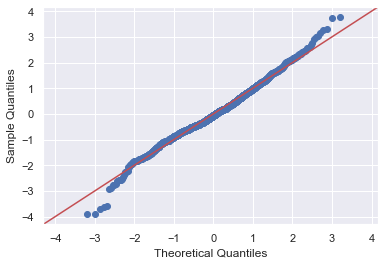

In [20]:
# Scatterpoints align closely with the QQline concluding log1p(y) i.e Saleprice is approximately normally distributed.
fig = sm.qqplot(y,fit=True, line='45')

### Dealing with Outliers

In [21]:
# Trimmed mean is close to sample mean, this suggests there are no extreme outliers
from scipy import stats
m = stats.trim_mean(y, 0.1)
print("With 10% clipped on both sides, trimmed mean: {}".format(m))
print("Sample mean: {}".format(np.mean(y)))
print("Trimmed mean is close to sample mean, this suggests there are no extreme outliers")

With 10% clipped on both sides, trimmed mean: 12.017114356316347
Sample mean: 12.024057394918371
Trimmed mean is close to sample mean, this suggests there are no extreme outliers


### Finding data type of each column

In [22]:
pd.set_option('display.max_rows', None)
data_types = train.dtypes
print(data_types)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Preprocessing

In [23]:
train['SalePrice'].head(50)

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
20    325300
21    139400
22    230000
23    129900
24    154000
25    256300
26    134800
27    306000
28    207500
29     68500
30     40000
31    149350
32    179900
33    165500
34    277500
35    309000
36    145000
37    153000
38    109000
39     82000
40    160000
41    170000
42    144000
43    130250
44    141000
45    319900
46    239686
47    249700
48    113000
49    127000
Name: SalePrice, dtype: int64

In [24]:
# dropping Salesprice from train dataset.
target = y
saleprice = train['SalePrice']
train = train.drop(['SalePrice'], axis = 1)
# Saving ID of train and test sets.
train_id = train['Id']
test_id = test['Id']

In [25]:
# Combine train and test features before preprocessing.
combined_data = pd.concat([train, test])
all_data = combined_data.drop(['Id'], axis = 1)
all_data.shape

(2919, 79)

### Imputing Missing Values:

In [26]:
# Number of missing values in data.
all_data_na = all_data.isnull().sum()
all_data_na = all_data_na[all_data_na>0]
all_data_na.sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

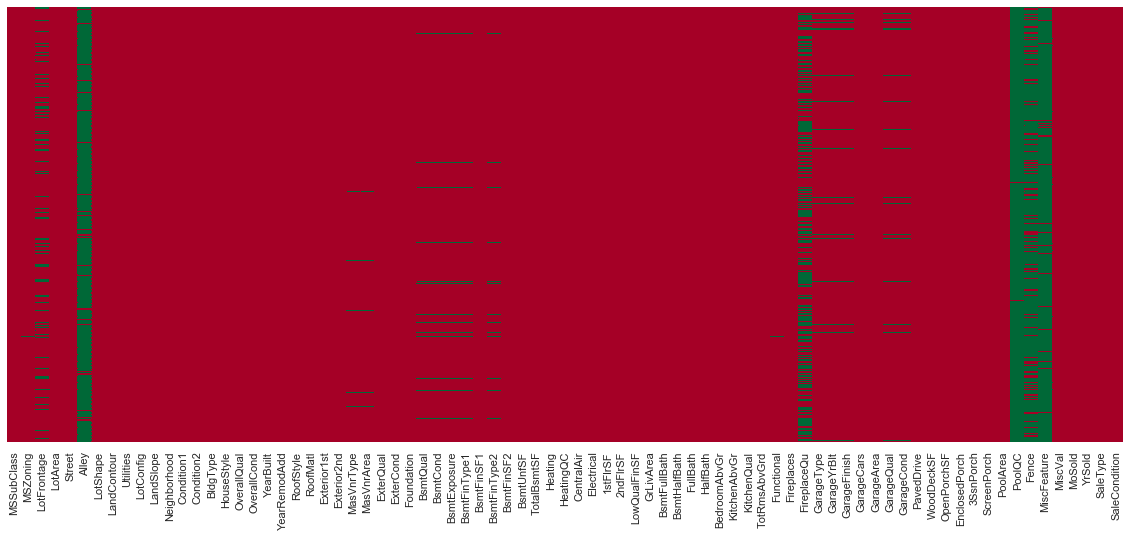

In [27]:
'''Simple visualization of missing variables data'''
plt.figure(figsize=(20,8))
sns.heatmap(all_data.isnull(), yticklabels=False, cbar=False, cmap = 'RdYlGn')

In [28]:
'''first impute by None where NA means something'''
print("NAs in data : " + str(all_data.isnull().values.sum()))
impute_none = all_data.loc[:, ['MiscFeature','Alley', 'GarageType', 'MasVnrType','PoolQC','Fence',
                               'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 
                               'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']]
for i in impute_none.columns:
    all_data[i].fillna('None', inplace = True)
print("Remaining NAs in data : " + str(all_data.isnull().values.sum()))

NAs in data : 13965
Remaining NAs in data : 691


In [29]:
'''These categorical variables will be imputed by mode.'''
print("NAs in data : " + str(all_data.isnull().values.sum()))
impute_mode = all_data.loc[:, ['Functional', 'Utilities', 'KitchenQual', 'MSZoning',
                               'SaleType','Exterior2nd','Exterior1st','Electrical']]
for i in impute_mode.columns:
    all_data[i].fillna(all_data[i].mode()[0], inplace = True)
print("Remaining NAs in data : " + str(all_data.isnull().values.sum()))

NAs in data : 691
Remaining NAs in data : 678


In [30]:
'''The following variables are either discrete or continuous numerical variables.So they will be imputed by median.'''
print("NAs in data : " + str(all_data.isnull().values.sum()))
impute_median =all_data.loc[:, ['LotFrontage','BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea',
                                'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in impute_median.columns:
    all_data[i].fillna(all_data[i].median(), inplace = True)
print("Remaining NAs in data : " + str(all_data.isnull().values.sum()))

NAs in data : 678
Remaining NAs in data : 159


In [31]:
# ''' GarageYrBlt NAs can be imputed with YearBuilt if no remodelling and addition is done else impute by YearRemodAdd.'''
print("NAs in data : " + str(all_data.isnull().values.sum()))
mod_data = all_data.loc[:,['YearBuilt','YearRemodAdd']]
def myfunc(x,y):
    if x >= y:
        return x
    else:
        return y

mod_data['YearBuilt'] = mod_data.apply(lambda x: myfunc(x.YearBuilt, x.YearRemodAdd), axis=1)
fill_data = mod_data.loc[:, ['YearBuilt']]
addition = combined_data.loc[:, ['Id']]
fill_data = pd.concat([addition,fill_data], axis = 1)
new_col = all_data.loc[:,['GarageYrBlt']]
new_col = pd.concat([addition,new_col], axis = 1)
new_col['GarageYrBlt'] = new_col['GarageYrBlt'].fillna(new_col['Id'].map(fill_data.set_index('Id')['YearBuilt']))
all_data['GarageYrBlt'] = new_col.loc[:,['GarageYrBlt']]
print("Remaining NAs in data : " + str(all_data.isnull().values.sum()))

NAs in data : 159
Remaining NAs in data : 0


In [32]:
#separating numerical variables from categorical variables.
cat_data = all_data.select_dtypes(include=['object']).columns
num_data = all_data.select_dtypes(exclude=['object']).columns
cat_data = all_data[cat_data]
num_data = all_data[num_data]

### Encoding Categorical variables

In [33]:
# Label Encoding the variables.
column_names = cat_data.columns
for i in column_names:
    cat_data[i] = cat_data[i].astype('category')
    cat_data[i] = cat_data[i].cat.codes
cat_data.shape

(2919, 43)

In [34]:
pd.set_option('display.max_columns', None)
cat_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,3,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,3,0,6,1,2,1,4,2,6,2,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4


In [35]:
cat_data2 = pd.get_dummies(cat_data, columns=cat_data.columns, drop_first= True)
cat_data2.shape

(2919, 223)

In [36]:
cat_data2.head()

,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_1,Alley_1,Alley_2,LotShape_1,LotShape_2,LotShape_3,LandContour_1,LandContour_2,LandContour_3,Utilities_1,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LandSlope_1,LandSlope_2,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_5,Condition1_6,Condition1_7,Condition1_8,Condition2_1,Condition2_2,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Condition2_7,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofMatl_1,RoofMatl_2,RoofMatl_3,RoofMatl_4,RoofMatl_5,RoofMatl_6,RoofMatl_7,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_6,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_15,MasVnrType_1,MasVnrType_2,MasVnrType_3,ExterQual_1,ExterQual_2,ExterQual_3,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,Heating_1,Heating_2,Heating_3,Heating_4,Heating_5,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,CentralAir_1,Electrical_1,Electrical_2,Electrical_3,Electrical_4,KitchenQual_1,KitchenQual_2,KitchenQual_3,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,PavedDrive_1,PavedDrive_2,PoolQC_1,PoolQC_2,PoolQC_3,Fence_1,Fence_2,Fence_3,Fence_4,MiscFeature_1,MiscFeature_2,MiscFeature_3,MiscFeature_4,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [37]:
# Concating categorical and numerical data
all_data2 = pd.concat([num_data,cat_data2], axis = 1)
all_data2.shape

(2919, 259)

In [38]:
# Obtaing train and test set from the data
final_train = all_data2.iloc[0:1460 , :]
final_test = all_data2.iloc[1460: , :]
print(final_train.shape)
print(final_test.shape)

(1460, 259)
(1459, 259)


In [39]:
final_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_1,Alley_1,Alley_2,LotShape_1,LotShape_2,LotShape_3,LandContour_1,LandContour_2,LandContour_3,Utilities_1,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LandSlope_1,LandSlope_2,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_5,Condition1_6,Condition1_7,Condition1_8,Condition2_1,Condition2_2,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Condition2_7,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofMatl_1,RoofMatl_2,RoofMatl_3,RoofMatl_4,RoofMatl_5,RoofMatl_6,RoofMatl_7,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_6,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_15,MasVnrType_1,MasVnrType_2,MasVnrType_3,ExterQual_1,ExterQual_2,ExterQual_3,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,Heating_1,Heating_2,Heating_3,Heating_4,Heating_5,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,CentralAir_1,Electrical_1,Electrical_2,Electrical_3,Electrical_4,KitchenQual_1,KitchenQual_2,KitchenQual_3,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,PavedDrive_1,PavedDrive_2,PoolQC_1,PoolQC_2,PoolQC_3,Fence_1,Fence_2,Fence_3,Fence_4,MiscFeature_1,MiscFeature_2,MiscFeature_3,MiscFeature_4,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,3

## Model Fitting

In [40]:
# Importing sklearn libraries
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMRegressor

In [41]:
y_train = y
X_train = final_train
lgrid = np.linspace(0.01, 100, num=1000,endpoint=True)

### Ridge regression

In [42]:
from sklearn.linear_model import RidgeCV
ridge_clf = make_pipeline(RobustScaler(), RidgeCV(alphas = lgrid, cv = 5))

In [43]:
from sklearn.linear_model import Ridge
coefs = []
for a in lgrid:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

#### Graph of weights against alphas

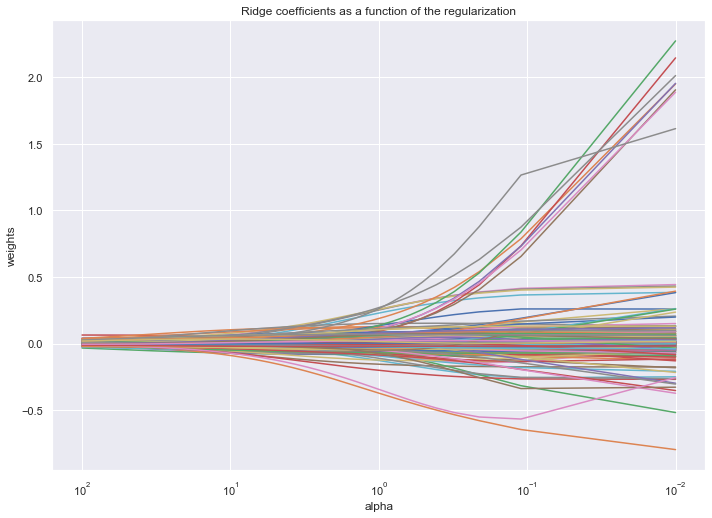

In [44]:
# The larger alpha is, the bigger the regularization effect and hence, the smaller the coefficients.
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.plot(lgrid, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [45]:
ridge_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-02, 1.10090090e-01, 2.10180180e-01, 3.10270270e-01,
       4.10360360e-01, 5.10450450e-01, 6.10540541e-01, 7.10630631e-01,
       8.10720721e-01, 9.10810811e-01, 1.01090090e+00, 1.11099099e+00,
       1.2...
       9.80982883e+01, 9.81983784e+01, 9.82984685e+01, 9.83985586e+01,
       9.84986486e+01, 9.85987387e+01, 9.86988288e+01, 9.87989189e+01,
       9.88990090e+01, 9.89990991e+01, 9.90991892e+01, 9.91992793e+01,
       9.92993694e+01, 9.93994595e+01, 9.94995495e+01, 9.95996396e+01,
       9.96997297e+01, 9.97998198e+01, 9.98999099e+01, 1.00000000e+02]),
                         cv=5, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring=None,
                         store_cv_val

In [46]:
preds_ridge = ridge_clf.predict(final_test)

In [47]:
# Checking Cross Validation Score.
from sklearn.model_selection import cross_val_score
print('Ridge Regression Cross Validation Score: %s' % (
                      cross_val_score(ridge_clf, X_train, y_train,scoring='neg_mean_squared_error').mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge Regression Cross Validation Score: -0.020624477100858817


### LASSO

In [48]:
from sklearn.linear_model import LassoCV
lasso_clf = make_pipeline(RobustScaler(), LassoCV(alphas=lgrid, cv=5))

In [49]:
lasso_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lassocv',
                 LassoCV(alphas=array([1.00000000e-02, 1.10090090e-01, 2.10180180e-01, 3.10270270e-01,
       4.10360360e-01, 5.10450450e-01, 6.10540541e-01, 7.10630631e-01,
       8.10720721e-01, 9.10810811e-01, 1.01090090e+00, 1.11099099e+00,
       1.2...
       9.88990090e+01, 9.89990991e+01, 9.90991892e+01, 9.91992793e+01,
       9.92993694e+01, 9.93994595e+01, 9.94995495e+01, 9.95996396e+01,
       9.96997297e+01, 9.97998198e+01, 9.98999099e+01, 1.00000000e+02]),
                         copy_X=True, cv=5, eps=0.001, fit_intercept=True,
                         max_iter=1000, n_alphas=100, n_jobs=None,
                         normalize=False, positive=False, precompute='auto',
                         random_state=None, selection='cyclic', tol=0.0001,
      

In [50]:
preds_lasso = lasso_clf.predict(final_test)

In [51]:
# Checking Cross Validation Score.
print('Lasso Cross Validation Score: %s' % (
                      cross_val_score(lasso_clf, X_train, y_train,scoring='neg_mean_squared_error').mean()))

Lasso Cross Validation Score: -0.025771379440506597


### ElasticNet

In [52]:
from sklearn.linear_model import ElasticNetCV
elastic_clf = make_pipeline(RobustScaler(), ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],alphas=lgrid, cv=5))

In [53]:
elastic_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-02, 1.10090090e-01, 2.10180180e-01, 3.10270270e-01,
       4.10360360e-01, 5.10450450e-01, 6.10540541e-01, 7.10630631e-01,
       8.10720721e-01, 9.10810811e-01, 1.01090090e+00, 1.110990...
       9.92993694e+01, 9.93994595e+01, 9.94995495e+01, 9.95996396e+01,
       9.96997297e+01, 9.97998198e+01, 9.98999099e+01, 1.00000000e+02]),
                              copy_X=True, cv=5, eps=0.001, fit_intercept=True,
                              l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                              max_iter=1000, n_alphas=100, n_jobs=None,
                              normalize=False, positive=False,
                              precompute='auto', random_state=None,
                     

In [54]:
preds_elastic = elastic_clf.predict(final_test)

In [55]:
# Checking Cross Validation Score.
print('ElasticNet Cross Validation Score: %s' % (
                      cross_val_score(elastic_clf, X_train, y_train,scoring='neg_mean_squared_error').mean()))

ElasticNet Cross Validation Score: -0.0211354966632166


### Gradient Boosted Regression

In [56]:
import xgboost as xgb
xgtrain = xgb.DMatrix(X_train,label=y_train)
xgb_clf = xgb.XGBRegressor(n_estimators=1000, learning_rate=.03, max_depth=3, max_features=.04, min_samples_split=4,
                           min_samples_leaf=3, loss='huber', subsample=1.0, random_state=0)
xgb_param = xgb_clf.get_xgb_params()

In [57]:
xgb_clf.fit(X_train,y_train)

[16:57:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { loss, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, loss='huber', max_delta_step=0, max_depth=3,
             max_features=0.04, min_child_weight=1, min_samples_leaf=3,
             min_samples_split=4, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, ...)

In [58]:
preds_xgb = xgb_clf.predict(final_test)

In [59]:
# Checking Cross Validation Score.
print('XGB Regression Cross Validation Score: %s' % (
                      cross_val_score(xgb_clf, X_train, y_train,scoring='neg_mean_squared_error').mean()))

[16:57:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { loss, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:57:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { loss, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:57:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { loss, max_features

### Light Gradient Boosting

In [60]:
# Fit Light Gradient Boosting:
lightgbm = LGBMRegressor(objective='regression', 
                         num_leaves=4,
                         learning_rate=0.01, 
                         n_estimators=5000,
                         max_bin=200, 
                         bagging_fraction=0.75,
                         bagging_freq=5, 
                         bagging_seed=7,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1)

lightgbm.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2, feature_fraction_seed=7,
              importance_type='split', learning_rate=0.01, max_bin=200,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=5000, n_jobs=-1, num_leaves=4,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [61]:
preds_lgb = lightgbm.predict(final_test)

In [62]:
# Checking Cross Validation Score.
print('LGB Regression Cross Validation Score: %s' % (
                      cross_val_score(lightgbm, X_train, y_train,scoring='neg_mean_squared_error').mean()))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

## Stacking and Blending

In [63]:
'''Stacking involves building a metamodel, that weighs our models' predictions together, to give our final predictions.
Here, we will use StackingCVRegressor for greater stability of results'''
from mlxtend.regressor import StackingCVRegressor


ridge = make_pipeline(RobustScaler(),RidgeCV(alphas=lgrid, cv=5))
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=lgrid, cv=5))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],alphas=lgrid, cv=5))
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
xgboost = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)


stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)
stack_gen.fit(np.array(X_train), np.array(y_train))

[17:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:17

StackingCVRegressor(cv=5,
                    meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=0.7, gamma=0,
                                                gpu_id=None,
                                                importance_type='gain',
                                                interaction_constraints=None,
                                                learning_rate=0.01,
                                                max_delta_step=None,
                                                max_depth=3, min_child_weight=0,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=3460, n_jo...
                                 

In [64]:
stacked_preds = stack_gen.predict(np.array(final_test))

In [65]:
# Blending:Blending involves taking simple/weighted averages of our predictions to give our final predictions
def blend_models_predict(preds_ridge, preds_xgb, preds_lgb):
    return (np.exp(preds_ridge) + np.exp(preds_xgb) + np.exp(preds_lgb))/3

In [66]:
submission = pd.DataFrame({'Id': test_id, 'SalePrice': np.exp(preds_lgb)})

In [67]:
# Stack Ridge Regression and XGBoost Regression Predictions
blend_preds = blend_models_predict(preds_ridge, preds_xgb, preds_lgb)
blend_submission = pd.DataFrame({'Id': test_id, 'SalePrice': blend_preds})
stacked_submission = pd.DataFrame({'Id': test_id, 'SalePrice': np.exp(stacked_preds)})

In [68]:
# Save Stacked and XGBoost Regression Predictions
submission.to_csv('Submission.csv',index=False)
stacked_submission.to_csv('Stacked_Submission.csv', index=False)
blend_submission.to_csv('Blend_Submission.csv', index=False)

In [69]:
# SUMMARY
'''Here we can conclude that Light Grading boosting has Cross Validation Score: -0.01603367673085801 which is lowest among all other models compared.'''

'Here we can conclude that Light Grading boosting has Cross Validation Score: -0.01603367673085801 which is lowest among all other models compared.'